___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Recommender Systems with Python

Welcome to the code notebook for Recommender Systems with Python. In this lecture we will develop basic 'recommendation systems' using Python and Pandas. In this notebook we will be using the source data files 'Movie_Id_Titles' and 'u.data'.

There is another notebook: *Advanced Recommender Systems with Python*, which goes into more detail using the same dataset.

In this notebook, we will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. Keep in mind, this is not a true robust recommendation system, to describe it more accurately,it just tells you what movies/items are most similar to your movie choice.

There is no project for this topic, instead you have the option to work through the advanced lecture version of this notebook.



## Import Libraries

In [1]:
import numpy as np
import pandas as pd

## Get the Data

First get the movie ratings:

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

movie_ratings = pd.read_csv('u.data', sep='\t', names=column_names)

In [3]:
# DataFrame of movie ratings (1 to 5 stars)

movie_ratings.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
# 100,003 rows and 4 columns

movie_ratings.shape

(100003, 4)

Now let's get the movie titles:

In [5]:
# DataFrame of movie titles

movie_titles = pd.read_csv("Movie_Id_Titles")

movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
# 1,682 rows and 2 columns

movie_titles.shape

(1682, 2)

We can 'merge' them together on matching column (where item_id matches, the title will repeat):

In [7]:
df = pd.merge(movie_ratings, movie_titles, on='item_id')

df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [8]:
# 100,003 rows and 5 columns

df.shape

(100003, 5)

# EDA

We have the following features:

* **user_id** is unique ID for the user
* **item_id** is unique ID for movie 
* **rating** is rating by user for movie
* **timestamp** is time when rating was made (we don't care about this variable)
* **title** is the movie title

Let's explore the data and get a look at some of the best rated movies.

## Visualization Imports

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

%matplotlib inline

Create a ratings DataFrame with average rating and number of ratings per movie, to produce data visualizations:

In [10]:
# Group by title and find average rating per movie

df.groupby('title')['rating'].mean().sort_values(ascending=False).head(11)

title
They Made Me a Criminal (1939)                       5.000
Marlene Dietrich: Shadow and Light (1996)            5.000
Saint of Fort Washington, The (1993)                 5.000
Someone Else's America (1995)                        5.000
Star Kid (1997)                                      5.000
Great Day in Harlem, A (1994)                        5.000
Aiqing wansui (1994)                                 5.000
Santa with Muscles (1996)                            5.000
Prefontaine (1997)                                   5.000
Entertaining Angels: The Dorothy Day Story (1996)    5.000
Pather Panchali (1955)                               4.625
Name: rating, dtype: float64

In [ ]:
# 10 movies have the best average ratings possible! It would be interesting to see how many people actually rated these movies..
# I've never heard of them!!

In [11]:
# Group by title and find total number of ratings per movie

df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [12]:
# Makes sense that Star Wars has the most ratings...

In [13]:
# Create ratings DataFrame of average ratings per movie

df_ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

df_ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


Note that the movie title is now the index because you 'grouped by' it.

Now add the number of ratings column to this DataFrame:

In [14]:
df_ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

df_ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [15]:
df_ratings[df_ratings['rating'] == 5]

,rating,num of ratings
title,,
Aiqing wansui (1994),5.0,1
Entertaining Angels: The Dorothy Day Story (1996),5.0,1
"Great Day in Harlem, A (1994)",5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
Prefontaine (1997),5.0,3
"Saint of Fort Washington, The (1993)",5.0,2
Santa with Muscles (1996),5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3


In [ ]:
# HA! All the movies with the top average rating only had 1-3 people voting hence such high scores

Now a few histograms:

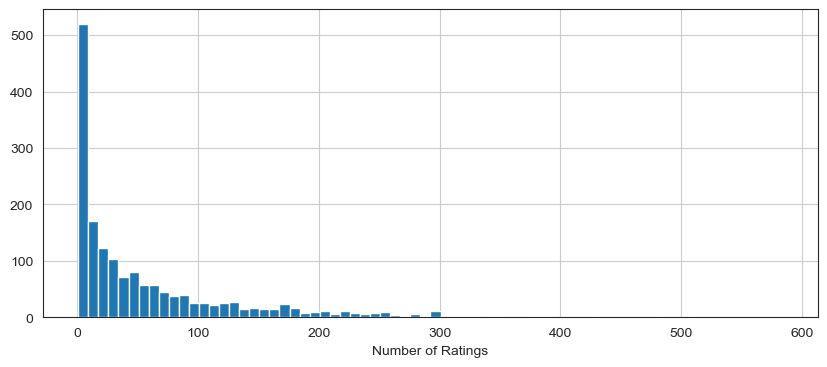

In [16]:
plt.figure(figsize=(10, 4))

df_ratings['num of ratings'].hist(bins=70)
plt.xlabel('Number of Ratings');

In [17]:
# The majority of films had few ratings - usually because only the big films have lots of ratings

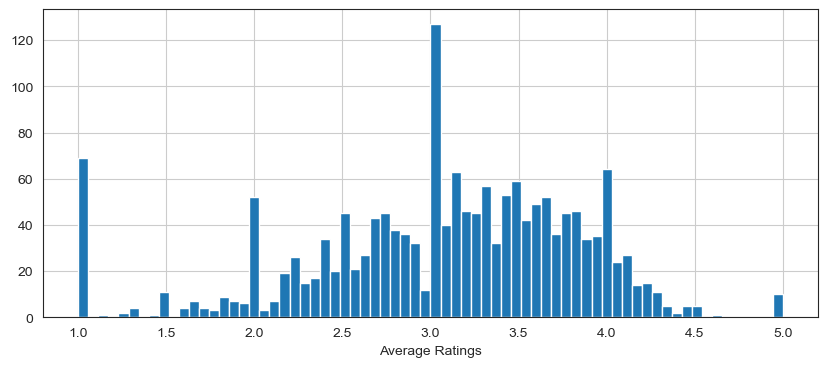

In [19]:
plt.figure(figsize=(10, 4))

df_ratings['rating'].hist(bins=70)
plt.xlabel('Average Ratings');

In [20]:
# The peaks at 1, 2, 3, 4 & 5 make sense due to the rating levels
# Average ratings are slightly normally distributed around 3-3.5 stars
# Quite a few 1 star ratings! Lots of terrible movies...
# Can see the outliers at rating of 5-stars, where 1 or 2 people voted high scores

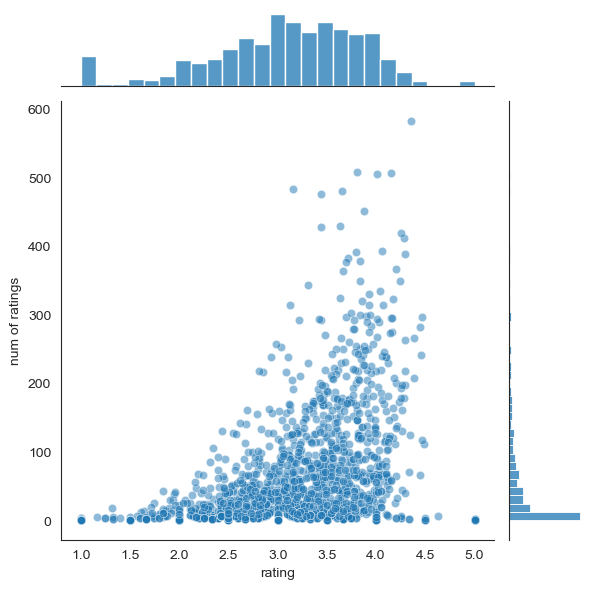

In [21]:
# Relationship between average ratings and the number of ratings

sns.jointplot(x='rating', y='num of ratings', data=df_ratings, alpha=0.5);

It makes sense that the higher the movie rating, the more likely users will have watched it and then logged onto website to leave a rating! 

Now that we have a general idea of what the data looks like, keep in mind that a lot of movies with high ratings had few users rating them.  You should concentrate on movies which have more than 100 ratings.

Let's move on to creating a simple recommendation system:

## Recommending Similar Movies

Create a **matrix** that has the user ids on the index and the movie titles on the column axis. Each cell will then consist of the rating the user gave to that movie. 

Note there will be a lot of NaN values, because most people have not seen most of the movies. You cannot delete them because you will end up losing most of the data.

In [22]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [23]:
movie_matrix = df.pivot_table(index='user_id', columns='title', values='rating')

movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most rated movies:

In [24]:
df_ratings.sort_values('num of ratings', ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In order to analyse the ratings for a movie, you need to isolate it from the matrix, in order to deal with the null values. Let's choose two movies, e.g. Star Wars, a sci-fi movie, and Liar Liar, a comedy.

In [25]:
df_ratings.loc['Star Wars (1977)']

rating              4.359589
num of ratings    584.000000
Name: Star Wars (1977), dtype: float64

In [26]:
df_ratings.loc['Liar Liar (1997)']

rating              3.156701
num of ratings    485.000000
Name: Liar Liar (1997), dtype: float64

Grab the individual user ratings for those two movies from the matrix DataFrame, i.e. the movie columns:

In [27]:
starwars_ratings = movie_matrix['Star Wars (1977)']
liarliar_ratings = movie_matrix['Liar Liar (1997)']

starwars_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [28]:
liarliar_ratings.head()

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64

Use `corrwith()` method to get correlations between the two movies user ratings (Pandas Series) and the matrix. The `corrwith()` method computes pair-wise correlation between a DataFrame and a Series or DataFrame.

In [29]:
similar_to_starwars = movie_matrix.corrwith(starwars_ratings)

C:\Users\shmel\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\shmel\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [40]:
similar_to_starwars.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [30]:
similar_to_liarliar = movie_matrix.corrwith(liarliar_ratings)

In [39]:
similar_to_liarliar.head()

title
'Til There Was You (1997)    0.118913
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.469765
12 Angry Men (1957)          0.066272
187 (1997)                   0.175145
dtype: float64

Warning error messages are due to the missing values, which we can clean by removing NaN values, and using a DataFrame instead of a Series:

In [31]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])

corr_starwars.dropna(inplace=True)

corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


Now if we 'sort' the output Star Wars DataFrame by **correlation** values, we should get the movie most similar to Star Wars, however, note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched Star Wars (it was the most popular movie). 

In [32]:
corr_starwars.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [ ]:
# I never thought that Commandments is perfectly correlated to Star Wars, i.e. they're exactly the same! Yeah right

Let's fix this by filtering out movies that have less than 100 ratings (this value was chosen based off the histogram for total number of ratings).

In order to do this, you need to 'join' the column for number of ratings to the correlation values for Star Wars:

In [33]:
corr_starwars = corr_starwars.join(df_ratings['num of ratings'])

corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


Now sort the values and filter the result.

Notice how the titles now make a lot more sense:

In [34]:
corr_starwars[corr_starwars['num of ratings'] > 100].sort_values('Correlation', ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [ ]:
# Star Wars is similar to Empire Strikes Back the most, which makes sense. Then Return of the Jedi
# Note that Star Wars is perfectly correlated with itself only!
# Big drop in correlation when you get to Austin Powers. They not similar but they are both popular

Now the same for the comedy Liar Liar:

In [35]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns=['Correlation'])

corr_liarliar.dropna(inplace=True)

corr_liarliar = corr_liarliar.join(df_ratings['num of ratings'])

corr_liarliar[corr_liarliar['num of ratings'] > 100].sort_values('Correlation', ascending=False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


In [ ]:
# Batman Forever is the most similar movie to Liar Liar, but only slightly higher than The Mask, which makes more sense.
# Both Batman Forever and Liar Liar were very popular, which might be why Batman beat The Mask to top position

# Great Job!